# Tarea-examen 2
  


### Armando Q. Arciniega Gutiérrez

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from collections import namedtuple  
from itertools import zip_longest   
from functools import partial

## Interpolación 

1.- Interpolar $$f(x)= 2\sin(\pi x/6)$$

In [188]:
def interp_cuadr(x, p0, p1, p2):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    return y0*((x-x1)*(x-x2)/(x0-x1)*(x0-x2))+y1*((x-x0)*(x-x2)/(x1-x0)*(x1-x2))+y2*((x-x0)*(x-x1)/(x2-x0)*(x2-x1))             #formula de interpolacion cuadratica

def interp_cubic(x, p0, p1, p2, p3):
    x0, y0 = p0   #pn son los nodos (xn,yn) 
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p2
    
    A=((x-x1)*(x-x2)*(x-x3))/((x0-x1)*(x0-x2)*(x0-x3))
    B=((x-x0)*(x-x2)*(x-x3))/((x1-x0)*(x1-x2)*(x1-x3))
    C=((x-x0)*(x-x1)*(x-x3))/((x2-x0)*(x2-x1)*(x2-x3))
    D=((x-x0)*(x-x1)*(x-x2))/((x3-x0)*(x3-x1)*(x3-x2))
    
    return y0*A+y1*B+y2*C+y3*D

a) Use $P_2(x)$ para aproximar f(2) y f(2.4)

In [192]:
a=pi/6.0
X = [0.0, 1.0, 3.0]
Xa = [a*0.0, a*1.0, a*3.0] #lista auxiliar para multiplicar por pi/6
Y = 2*np.sin(Xa)
Puntos = list(zip(X,Y)) 

res = interp_cuadr(2.0, Puntos[0], Puntos[1], Puntos[2])
print("Para x=2 el valor interpolado es =", res) 
print("Valor real =", 2.0*sin(2.0*pi/6))
print("Error =", abs(2*sin(2.0*pi/6) - res))

Para x=2 el valor interpolado es = 6.666666666666666
Valor real = 1.7320508075688772
Error = 4.934615859097789


In [131]:
res = interp_cuadr(2.4, Puntos[0], Puntos[1], Puntos[2])
print("Para x=2.4 el valor interpolado es=", res) 
print("Valor real =", 2*np.sin(2.4*np.pi/6))
print("Error =", abs(2*sin(2.4*pi/6) - res))

Para x=2.4 el valor interpolado es= 7.359999999999999
Valor real = 1.902113032590307
Error = 5.457886967409692


b) Use $P_3(x)$ para aproximar f(2) y f(2.4)

In [189]:
a=pi/6.0
X = [0.0,1.0,3.0,5.0]
X1 = [0.0,1.0*a,3.0*a,5.0*a]  #uso una lista auxiliar para multiplicar por pi/6
Y1 = 2.0*np.sin(X1)
Puntos1 = list(zip(X,Y1))


print(Puntos1[0],Puntos1[1],Puntos1[2],Puntos1[3])
yinterpolada = interp_cubic(2.0, Puntos1[0], Puntos1[1], Puntos1[2], Puntos1[3])
#"{:.4}, {:.4}, error = {:.4e}".format(yinterpolada, 2*(np.sin(np.pi*(4/6))), 2*(np.sin(np.pi*(4/6))) - yinterpolada)
print('Aproximación de f(2.4) por interpolación cúbica')
print('f(x) interpolada =',yinterpolada) 
print('f(x) real = ',2*(sin(pi*(2.0/6.0))))
print('Error =  ', 2*(sin(pi*2.0/6.0)) - yinterpolada)

(0.0, 0.0) (1.0, 0.9999999999999999) (3.0, 2.0) (5.0, 1.0000000000000007)


ZeroDivisionError: float division by zero

c) Use $P_2(x)$ para aproximar f(3.5) y f(4)

In [144]:
a=pi/6
X = [0.0, 1.0, 3.0]
Xa = [a*0.0, a*1.0, a*3.0]
Y = 2*np.sin(Xa)
Puntos = list(zip(X,Y)) 

res = interp_cuadr(3.5, Puntos[0], Puntos[1], Puntos[2])
print("Para x=3.5 el valor interpolado es =", res) 
print("Valor real =", 2.0*sin(3.5*pi/6))
print("Error =", abs(2*sin(3.5*pi/6) - res))

Para x=3.5 el valor interpolado es = 8.166666666666666
Valor real = 1.9318516525781366
Error = 6.23481501408853


In [145]:
res = interp_cuadr(4.0, Puntos[0], Puntos[1], Puntos[2])
print("Para x=4.0 el valor interpolado es =", res) 
print("Valor real =", 2.0*sin(4.0*pi/6))
print("Error =", abs(2*sin(4.0*pi/6) - res))

Para x=4.0 el valor interpolado es = 8.0
Valor real = 1.7320508075688774
Error = 6.267949192431122


d) Use $P_3(x)$ para aproximar f(3.5) y f(4.0)

In [159]:
a=pi/6.0
X = [0.0,1.0,3.0,5.0]
X2 = [0.0,1.0*a,3.0*a,5.0*a]
Y2 = 2.0*np.sin(X2)
Puntos1 = list(zip(X,Y2))
        
print(Puntos1)
yinterpolada = interp_cubic(3.5, Puntos1[0], Puntos1[1], Puntos1[2], Puntos1[3])
#"{:.4}, {:.4}, error = {:.4e}".format(yinterpolada, 2*(np.sin(np.pi*(4/6))), 2*(np.sin(np.pi*(4/6))) - yinterpolada)
print('Aproximación de f(3.5) por interpolación cúbica')
print('f(x) interpolada =',yinterpolada) 
print('f(x) real = ', 2*(sin(pi*3.5/6)))
print('Error =  ', 2*(sin(pi*3.5/6) - yinterpolada))

[(0.0, 0.0), (1.0, 0.9999999999999999), (3.0, 2.0), (5.0, 1.0000000000000007)]


ZeroDivisionError: float division by zero

Para x=4 vuelve a haber un error. 
Parece que mi función de interpolación cúbica tiene un error y parece que divide por cero en alguna parte pero no he encontrado la forma de arreglarlo. 

### 2.- a) Calcula la tabla de diferencias divididas 

#### Se crean los nodos

In [12]:
X1 = [i+1 for i in range(5)] 
df_poli = pd.DataFrame([[x, 3.6/x] for x in X1], columns=["$x$", "$3.6/x$"]).transpose().style.format("{:g}")
df_poli

,0,1,2,3,4
$x$,1,2,3,4,5
$3.6/x$,3.6,1.8,1.2,0.9,0.72


#### Tabla de diferencias divididas

In [13]:
f_i = [(3.6/X1[i]) for i in range(5)]
f_ii = [(f_i[i+1] - f_i[i]) / (X1[i+1] - X1[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X1[i+2] - X1[i]) for i in range(3)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X1[i+3] - X1[i]) for i in range(2)]
f_iiiii = [(f_iiii[i+1] - f_iiii[i]) / (X1[i+4] - X1[i]) for i in range(1)]

ffdat = pd.DataFrame(list(zip_longest(f_i, f_ii, f_iii, f_iiii, f_iiiii)), 
          index=range(5), columns=["$f(x_i)$", "$Df(x_i)$", "$D^2 f(x_i)$", "$D^3 f(x_i)$", "$D^4 f(x_i)$"])
ffdat.insert(0, "$x_i$", X1) 
ffdat

,$x_i$,$f(x_i)$,$Df(x_i)$,$D^2 f(x_i)$,$D^3 f(x_i)$,$D^4 f(x_i)$
0,1,3.60,-1.80,0.60,-0.15,0.03
1,2,1.80,-0.60,0.15,-0.03,NaN
2,3,1.20,-0.30,0.06,NaN,NaN
3,4,0.90,-0.18,NaN,NaN,NaN
4,5,0.72,NaN,NaN,NaN,NaN


### b) Escribe los polinomios interpolados de Newton $P_1(x)$, $P_2(x)$, $P_3(x)$, $P_4(x)$

##### Los polinomios interpolados de Newton

\begin{align}
P_1(x) &= 3.6 -  1.8(x - 1)\\
P_2(x) &= P_1(x) + 0.6 (x - 1) (x - 2)\\
P_3(x) &= P_2(x) - 0.15 (x - 1) (x - 2) (x - 3)\\
P_4(x) &= P_3(x) + 0.03 (x - 1) (x - 2) (x - 3) (x - 4)\\
\end{align}

c) Calcule los valores de los polinomios hallados en el inciso (b) en los puntos x que se dan. $x=2.5, 3.5$

In [194]:
a=3.6    
b=-1.8
c=0.6
d=-0.15
e=0.03   # a,b,c,d,e son los coeficientes calculados para los Pn(x)
def P1(x):
    return a+ b*(x-1)
def P2(x):
    return P1(x)+c*(x-1)*(x-2)
def P3(x):
    return P2(x)+d*(x-1)*(x-2)*(x-3)
def P4(x):
    return P3(x)+e*(x-1)*(x-2)*(x-3)*(x-4)

Para x=2.5

In [15]:
print("P1(2.5)=",P1(2.5))
print("P2(2.5)=",P2(2.5))
print("P3(2.5)=",P3(2.5))
print("P4(2.5)=",P4(2.5))

P1(2.5)= 0.8999999999999999
P2(2.5)= 1.3499999999999999
P3(2.5)= 1.4062499999999998
P4(2.5)= 1.4231249999999998


Para x=3.5

In [16]:
print("P1(2.5)=",P1(3.5))
print("P2(2.5)=",P2(3.5))
print("P3(2.5)=",P3(3.5))
print("P4(2.5)=",P4(3.5))

P1(2.5)= -0.8999999999999999
P2(2.5)= 1.35
P3(2.5)= 1.06875
P4(2.5)= 1.0406250000000001


## Integración 

### 4.- Integración numérica

Para este ejercicio primero calcule el valor de la integral principal y después hice las correspondientes operaciones para obtener $irms$

In [195]:
def simpson(f, a, b, n):
    #calculamos h
    h=(b-a)/n  #0.005
    suma = 0.0
    for i in range(1, n):
        #calculamos la x
        #x=a-h+(2*h*i)
        x=a+i*h
        
        if(i % 2 == 0):
            suma = suma + 2 * fx(x, f)
        
        else:
            suma = suma + 4 * fx(x, f)
    
    suma = suma + fx(a, f) + fx(b, f)
    result = suma * (h / 3)
    return (result)


In [198]:
i0=1 #[A]
t0=0.05 #[seg]
b=0.2
def fx(x, f):          #esta funcion auxiliar evalua la funcion f sobre la variable x
    return eval(f)   

f = "(i0*(np.sin((np.pi*x)/t0)-b*(np.sin((2*np.pi*x)/t0))))**2"    

In [202]:
real=0.721110255092798  #obtenido de mathematica
i10=simpson(f,0,0.05,10)
i100=simpson(f,0,0.05,100)
i1000=simpson(f,0,0.05,1000)  #i es el valor de la integral 

irms10=np.sqrt((1/t0)*i10)
irms100=np.sqrt((1/t0)*i100)
irms1000=np.sqrt((1/t0)*i1000)  #irms es la función completa
print("El valor de la integral i_rms es:", irms1000)
print("El error con n=10 es:", abs(irms10-real))
print("El error con n=100 es:", abs(irms100-real))
print("El error con n=1000 es:", abs(irms1000-real))

El valor de la integral i_rms es: 0.7211102550927978
El error con n=10 es: 1.1102230246251565e-16
El error con n=100 es: 1.1102230246251565e-16
El error con n=1000 es: 2.220446049250313e-16


### 6.- Constante de Stephan Boltzman

Reescribiendo la integral 
$$
\int_0^\infty \frac{x^3}{e^{x}-1} dx =  \int_0^\infty x^3(e^x-1)^{-1} dx  = \int_0^\infty \frac{x^3 e^{-x}}{1-e^{-x}} dx  = \frac{\pi^4}{15} = 6.493939402266828...
$$

Se modificó la forma de la función en los difententes métodos ya que es muy inestable por en el límite al infinito.

In [20]:
kB =1.3806488e-23 #[J/K]
c= 299792458 #[m/s]
h=1.054571818e-34 #[Js]

from numpy import *

def trapecio(f,a,b,N):
    h= (b-a)/N
    s=0.0  #s=0.5*f(a)+0.5*f(b) metemos esto en el for
    for k in range(1,N//2+1):
        s+=f(a+(2*k-1)*h)
    return s*h

def Romberg(f,a,b,epsilon=1e-6):
    I = (b-a)/2*(f(b)+f(a)) #primer termino es trapecio
    eps=1
    N=1
    R =zeros((10000,10000)) 
    R[0,0]=I
    i=0
    while eps>epsilon:
        N*=2
        i+=1
        R[i,0] = R[i-1,0]/2 + trapecio(f,a,b,N)
        for m in range(i):
            R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
            eps = abs(R[i,m+1]-R[i-1,m])
    I= R[i,m+1]
    return I

def f(x):
    return np.exp(-x)*(x**3)/(1-np.exp(-x))
  
Itrap=trapecio(f,0,1000,2000)



print(Itrap) #Horrible
print("El error con el método del trapecio es", abs((pi**4/15)-trapecio(f,0,10000,2000)), "un error muy grande" )
print(Romberg(f,0,10,1e-16))

3.2487926178000746
El error con el método del trapecio es 2.248991897458323 un error muy grande
nan


C:\Users\arman\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


In [21]:
#función de la profesora
def simpson(f, a, b, N):
    h=0.01    #(b-a)/N
    k=0.0
    x=a+h
    for i in range(1, N/2):
        x += 2*h
        k += 4*f(x)
    for i in range(2,(N/2)-1):
        x += 2*h
        k += 2*f(x)
    return (h/3)*(f(a)+f(b)+k)


In [203]:
def f(x):          #esta funcion auxiliar evalua la funcion f sobre la variable x
    return (x**3)*(exp(x)-1)**(-1) 

print(simpson(f,0,1000,1000))



TypeError: eval() arg 1 must be a string, bytes or code object

In [204]:
def gaussxw(N):

    #Aproximación inicial de las raíces de los polinomios de Legendre
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

        # Encontramos ceros de Legendre con Newton-Raphson
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculando los pesos
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [205]:
def f(x):
    return (np.exp(-x)*(x**3))/(1-np.exp(-x))

N = 3000
a = 0.0
b = 100000.0

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Hacemos la integral
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)
print("El error es:", (pi**4/15)-s)

6.493939402261861
El error es: 4.9666937229631e-12


#### Una vez calculada la integral, calculamos $W$. 

Con el método del trapecio

In [25]:
from pylab import *
def Wtrapecio(T):
    C=c**2
    return (kB**4/(4*pi**2*C*h**3))*(T**4)*Itrap     #*trapecio(f,0,1000,2000)


In [26]:
#Valor real de W resolviendo analíticamente la integral
def Wreal(T):
    C=c**2
    return (kB**4/(4*pi**2*C*h**3))*(T**4)*(pi**4)/15

Con el método de cuadratura gaussiana

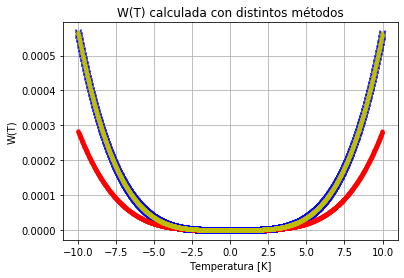

In [39]:
def Wquadgauss(T):
    C=c**2
    return (kB**4/(4*pi**2*C*h**3))*(T**4)*s     #*trapecio(f,0,1000,2000)
T=arange(-10.0,10.0,0.01)


plt.plot(T,Wquadgauss(T),'bx', label = "QuadGauss")
plt.plot(T,Wtrapecio(T),'r.', label = "Trapecio")
plt.plot(T,Wreal(T),'y.', label= "real")
grid(True)
title('W(T) calculada con distintos métodos')
ylabel('W(T)')
xlabel('Temperatura [K]')
plt.show()

En la gráfica anterior se grafican los valores de $W(T)$ para toda $T$ el valor real de la funcion $W(T)$ (línea amarilla), el método de Cuadratura Gaussiana (línea azul) es el que mejor aproxima. Por el otro lado la solución con el método del Trapecio (línea roja) con un error muy grande.  
Con los otros métodos no pude obtener W(T) :( 

#### En resumen... 

Me parece que lo importante es el valor de la integral 
$$\int_0^\infty \frac{x^3}{e^{x}-1} dx = \frac{\pi^4}{15} = 6.493939402266828...$$




Para todos los métodos se utilizó el límite superior de la integral un valor muy grande $b>>1$, de tal forma que $b\rightarrow \infty$. 

Para el método del trapecio se tiene que 

In [358]:
print("Valor calculado con el método del trapecio =",Itrap) #Horrible
print("El error con el método del trapecio es ", abs((pi**4/15)-trapecio(f,0,100000,20000)))

Valor calculado con el método del trapecio = 3.2487926178000746
El error con el método del trapecio es  2.248991897458323


Para el método de Quadratura Gaussiana

In [425]:
print("El valor de la integral es", s)
print("El error es:", (pi**4/15)-s)  

El valor de la integral es 6.493939402261861
El error es: 4.9666937229631e-12


Cuadratura Gaussiana aproxima con gran precisión.


Con los demás métodos hubo problemas para que calculara la integral. 

## Ecuaciones Diferenciales 

### 9.- Comparemos Métodos  

La ecuación diferencial a resolver es:
$$
\frac{d^2 x}{d t^2} = \frac{c}{m x^2} - \frac{k}{m}(x-L)
$$
se tomaron valores arbitrarios de las constantes $k$, $c$, $m$ y $L$

Método de Euler

In [544]:
def Euler(f,x0,v0,t):
    h=1e-5
    v = np.zeros(len(t))
    x = np.zeros(len(t))
    v[0] = v0
    x[0] = x0
    for n in range(0,len(t)-1):
        x[n+1] = x[n] + h*v[n]
        v[n+1] = v[n] + h*f(x[n],v[n])
        
    return v,x

C:\Users\arman\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


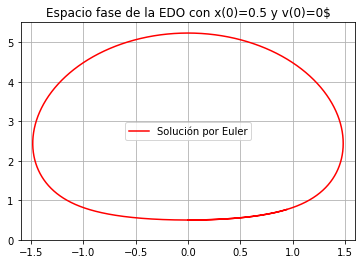

In [545]:
t = np.linspace(-100,100,1000000)
c=1
k=0.5
L=2.1
m=2   ##Valores arbitrarios
x0=0.5  #posicion inicial distinta de cero
v0=0



f = lambda x,v: (c/(m*x**2)) - (k/m)*(x-L)
eu = Euler(f,x0,v0,t)
plt.plot(eu[0],eu[1],'r-')
plt.legend(['Solución por Euler'])
plt.axis([-1.6,1.6,0,5.5])
plt.grid(True)
plt.title("Espacio fase de la EDO con x(0)=0.5 y v(0)=0$")
plt.show()


#print(y[0])
#print(y[1])

In [68]:
#método de runge kutta de 4to orden para ecuaciones dif de segundo orden
def RK4(f,x0,v0,t):
    h=1e-5
    v = np.zeros(len(t))
    x = np.zeros(len(t))
    v[0] = v0
    x[0] = x0
    for n in range(0,len(t)-1):
        k1=h*v
        l1=h*f(x0,v0)
        k2=h*(v+0.5*l1)
        l2=h*f(x0 + .5*h,  v0+0.5*k1)
        k3=h*(v+0.5*l2)
        l3=h*f(x0 + 0.5 * h, v0 + 0.5 * k2)
        l4=h*f(x0 + h, v0 + k3)
        k4=h*(v+l3)
        x[n+1] = x[n] + h*v[n]
        v[n+1] = v[n] + h*f(x[n],v[n])
        
    return v,x

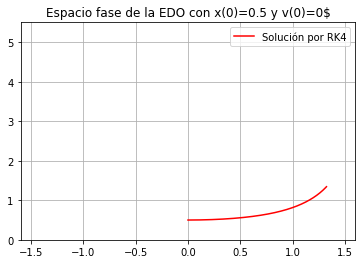

In [209]:
t = np.linspace(0,100,100000)
c=1
k=0.5
L=2.1
m=2   ##Valores arbitrarios
x0=0.5  #posicion inicial distinta de cero
v0=0
f = lambda x,v: (c/(m*x**2)) - (k/m)*(x-L)
rk = RK4(f,x0,v0,t)

plt.plot(rk[0],rk[1],'r-')
plt.legend(['Solución por RK4'])
plt.axis([-1.6,1.6,0,5.5])
plt.grid(True)
plt.title("Espacio fase de la EDO con x(0)=0.5 y v(0)=0$")
plt.show()

El problema con el método de Runge-Kutta 4 es que requiere de mucho tiempo computacional. En este caso no logré que graficara completamente la gráfica, sólo un pedazo de esta.

Método de Leap Frog

In [57]:
def LeapFrog(f,x0,v0,t):
    h=1e-5
    v = np.zeros(len(t))
    x = np.zeros(len(t))
    v[0] = v0; x[0] = x0
    for n in range(0,len(t)-1):
        x[n+1] = x[n] + h*v[n]+ h*h/2 *f(x[n],v[n])
        v[n+1] = v[n] + h/2*(f(x0,v0) + f(x[n+1],n+1))
        
    return v,x

C:\Users\arman\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


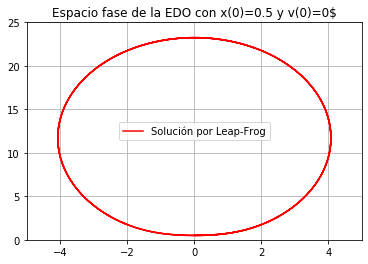

In [64]:
t = np.linspace(-100,100,5000000)
c=1
k=0.5
L=2.1
m=2   ##Valores arbitrarios
x0=0.5  #posicion inicial distinta de cero
v0=0
f = lambda x,v: (c/(m*x**2)) - (k/m)*(x-L)
lf = LeapFrog(f,x0,v0,t)

plt.plot(lf[0],lf[1],'r-')
plt.legend(['Solución por Leap-Frog'])
plt.axis([-5,5,0,25])
plt.grid(True)
plt.title("Espacio fase de la EDO con x(0)=0.5 y v(0)=0$")
plt.show()

No logré hallar el valor de la amplitud y el periodo. Pero logré resolver la EDO y graficar el espacio fase por 3 diferentes métodos, aunque para Runge-Kutta 4 requiere mucho tiempo computacional. 
Euler falla por mucho ya que el mejor resultado fue con Leap Frog y estoy seguro que para RK4 con suficiente tiempo y haciendo el linspace mas fino se llagará a una solución mejor pero mi computadora no pudo hacerlo bien. 

### Órbita de la tierra

Este código lo hice en otra clase de métodos numéricos, Vpython tiene animaciones muy buenas pero parece que Jupyter no acepta estas animaciones. 
Se obtiene muy bien los valores de la posición $(x,y)$ en cada valor de tiempo $t$. Esta animación se puede ver bien si el código se corre en una terminal, o bien en https://trinket.io/glowscript/31d0f9ad9e  o en https://www.glowscript.org/

Considerando que una unidad astronómica $[ua]$ es el radio de la órbita terrestre usaremos esta unidad para la longitud y $[ms]$ masas solares como unidad de masa. 
Calculé la constante gravitacional $G$ con la tercera ley de Kepler, que relaciona periodo de un planeta, radio de su órbita y la masa del planeta:
$$
T^2 = \frac{4\pi^2  a^3}{GM_{0}}
$$
tomando $a=1ua$, $T=1$ año y $M_0 =1ms$, despejando $G$
$$
G=4\pi^2 
$$
también se define $k=GMm$ masa del sol $M$ y de la tierra $m$. En estas unidades $k=GMm$. Además en coordenadas polares se tiene una relación del siguiente tipo:
$$
r'(\theta)^2 = \frac{m^2 r^4}{L^4} [ {\frac{2[E-E_{p}(r)]}{m} - \frac{L^2}{m^2r^2}]  } 
$$
donde $L$ es el momento angular y $E_p$ energía potencial la cual depende del momento angular. 
Usando la ecuación de la elipse en coordenadas polares se puede reescribir la EDO en estas variables. 

Al final usando el algoritmo de Verlet se obtiene el sistema de ecuaciones a resolver:
\begin{equation}
x_{n+1} = 2x_{n} - x_{n-1} - h^2\frac{GM}{r_n^2}(\frac{x_n}{r_n})
\end{equation}


\begin{equation}
y_{n+1} = 2y_{n} - y_{n-1} - h^2\frac{GM}{r_n^2}(\frac{y_n}{r_n})
\end{equation}
con
$$
r_n^2 = x_n^2 + y_n^2
$$

Para la iniciación del algoritmo se emplea
$$
x_{-1} = x_0 - v_0h + \frac{h^2}{2m}F(x_0,y_0)
$$
$$
y_{-1} = y_0 - v_0h + \frac{h^2}{2m}F(x_0,y_0)
$$
con $v_0=0$ , $y_0=0$ y $x_0=r_{min}$, donde $r_{min} = \frac{L^2}{(1+\varepsilon)mk}$ (que se obtiene de la EDO en coordenadas polares)

Además para F se ocupa la expresión de la gravitación universal de Newton,
$$
F(r) = G \frac{Mm}{r^2}
$$
o bien
$$
F(x,y) = G \frac{Mm}{x^2 + y^2}
$$

In [240]:
#%GlowScript 3.7.6 VPython
from vpython import *
h = 1.0/365.0  #[unidad astronomica]
m = 1.0/332946.0  #[masa de la tierra]
ep = 0.017     #energia potencial
T = 1.0   #periodo (1 año)


G = 4.0*pi*pi   ## Constante gravitacional
k = G*m        #constante definida
E = -pow(pi*pi*k*k*m/2.0/T/T,1.0/3.0)  #Energía 
L2 = m*k*k*(ep*ep-1)/2.0/E    #momento angular 
rmin = L2/(1+ep)/m/k  #radio minimo

x1=rmin
y1 = 0.0
vx = 0.0   #(x1,y1) condiciones iniciales
vy = sqrt(2/m*(E+k/rmin))   

##Le damos forma al sistema tierra-sol
display(range=1.2)
Tiempo = label(pos=vec(0,0.65,0), color=color.green,height = 16,text='t = 0.000', box=False)
Sol = sphere(pos=vec(0,0,0), radius=0.12, color=color.yellow)
Tierra = sphere(pos=vec(x1,y1,0), radius=0.05, color=color.blue,make_trail=True)

def fx(x,y):
    r3=pow(x*x+y*y,1.5)  #pow() funcion para "elevar"
    return(-G/r3*x)

def fy(x,y):
    r3=pow(x*x+y*y,1.5)
    return(-G/r3*y)

x0=x1-vx*h+h*h*fx(x1,y1)/2 
y0=y1-vy*h+h*h*fy(x1,y1)/2

for t in range(366):     #de 0 a 366 son 365 días
    rate(50)
    x2=2*x1-x0+h*h*fx(x1,y1)   #Algoritmo de Verlet 
    y2=2*y1-y0+h*h*fy(x1,y1)
    Tierra.pos=vec(x2,y2,0)
    S = str(t*h)[0:5]
    Tiempo.text='t = ' + S
    sleep(0.1)
    print ('t = ',S, ', x = ',x2,', y = ',y2)
    x0 = x1; x1 = x2
    y0 = y1; y1 = y2   

t =  0.0 , x =  0.9828466665256129 , y =  0.01750937811646199
t =  0.002 , x =  0.9823867163883702 , y =  0.035013293868071345
t =  0.005 , x =  0.9816203004247891 , y =  0.05250628685590642
t =  0.008 , x =  0.9805476699582996 , y =  0.06998290061185092
t =  0.010 , x =  0.9791691766931481 , y =  0.0874376845613562
t =  0.013 , x =  0.9774852725659727 , y =  0.104865195983038
t =  0.016 , x =  0.9754965095551564 , y =  0.12226000196405752
t =  0.019 , x =  0.9732035394480973 , y =  0.13961668135024063
t =  0.021 , x =  0.9706071135665658 , y =  0.15692982668989489
t =  0.024 , x =  0.9677080824503475 , y =  0.17419404617028938
t =  0.027 , x =  0.9645073954994015 , y =  0.19140396554577102
t =  0.030 , x =  0.9610061005747943 , y =  0.20855423005649795
t =  0.032 , x =  0.9572053435586962 , y =  0.22563950633678115
t =  0.035 , x =  0.9531063678737587 , y =  0.24265448431203485
t =  0.038 , x =  0.9487105139622186 , y =  0.25959387908334836
t =  0.041 , x =  0.9440192187251035 , y =  

t =  0.353 , x =  -0.645991960068989 , y =  0.777462149862295
t =  0.356 , x =  -0.6591403630606136 , y =  0.7666426142281182
t =  0.358 , x =  -0.6720997739342274 , y =  0.755603262877077
t =  0.361 , x =  -0.6848666033712115 , y =  0.7443474032522195
t =  0.364 , x =  -0.6974373200494921 , y =  0.7328783984367992
t =  0.367 , x =  -0.7098084514032544 , y =  0.7211996661393825
t =  0.369 , x =  -0.7219765843652106 , y =  0.7093146776722793
t =  0.372 , x =  -0.7339383660915081 , y =  0.6972269569235784
t =  0.375 , x =  -0.7456905046693706 , y =  0.6849400793230541
t =  0.378 , x =  -0.7572297698075654 , y =  0.6724576708022101
t =  0.380 , x =  -0.7685529935097933 , y =  0.6597834067487132
t =  0.383 , x =  -0.7796570707311006 , y =  0.6469210109554665
t =  0.386 , x =  -0.7905389600174133 , y =  0.6338742545645611
t =  0.389 , x =  -0.8011956841282978 , y =  0.6206469550063395
t =  0.391 , x =  -0.8116243306430496 , y =  0.6072429749337952
t =  0.394 , x =  -0.8218220525502181 , y =

t =  0.704 , x =  -0.3010898826301512 , y =  -0.9587550170831604
t =  0.706 , x =  -0.28462126728816517 , y =  -0.963479025384322
t =  0.709 , x =  -0.26806947360841576 , y =  -0.9679214644810283
t =  0.712 , x =  -0.25143927255725196 , y =  -0.9720807971995858
t =  0.715 , x =  -0.23473546586037136 , y =  -0.9759555656412942
t =  0.717 , x =  -0.217962884742442 , y =  -0.9795443918682192
t =  0.720 , x =  -0.20112638864956622 , y =  -0.9828459785711348
t =  0.723 , x =  -0.1842308639547475 , y =  -0.9858591097191635
t =  0.726 , x =  -0.16728122264653356 , y =  -0.9885826511906441
t =  0.728 , x =  -0.15028240100102352 , y =  -0.9910155513847512
t =  0.731 , x =  -0.13323935823744032 , y =  -0.9931568418133884
t =  0.734 , x =  -0.11615707515748379 , y =  -0.9950056376728785
t =  0.736 , x =  -0.09904055276869472 , y =  -0.9965611383949678
t =  0.739 , x =  -0.08189481089207425 , y =  -0.997822628176664
t =  0.742 , x =  -0.0647248867542183 , y =  -0.9987894764884259
t =  0.745 , x = 